### Load and Preview Cleaned Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_reddit_posts.csv")

# Check structure
print(df.info())
df.head()

ModuleNotFoundError: No module named 'seaborn'

### Convert to datetime

In [ ]:
# Convert the column to datetime
df['created_date'] = pd.to_datetime(df['created_date'])
df['year_month'] = df['created_date'].dt.to_period('M')

In [ ]:
sns.set_theme(style="whitegrid")

### Count the number of posts per subreddit

In [ ]:
post_counts = df['subreddit'].value_counts()

print("Number of posts per subreddit:")
print(post_counts)

Number of posts per subreddit:
subreddit
news             500
worldnews        500
technology       499
politics         498
TrueReddit       498
worldpolitics    493
Name: count, dtype: int64


### Posts Over Time by Subreddit

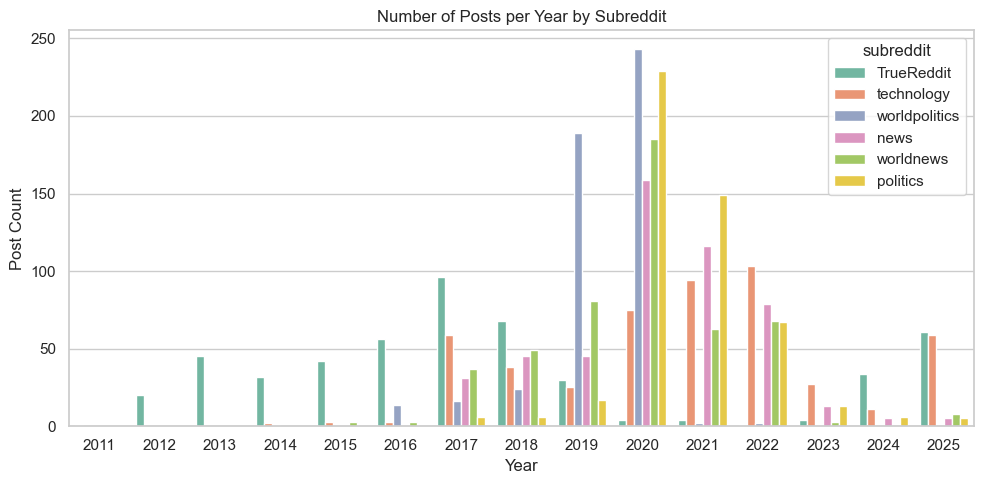

In [ ]:
df['year'] = df['created_date'].dt.year

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year', hue='subreddit', palette='Set2')
plt.title("Number of Posts per Year by Subreddit")
plt.xlabel("Year")
plt.ylabel("Post Count")
plt.tight_layout()
plt.show()


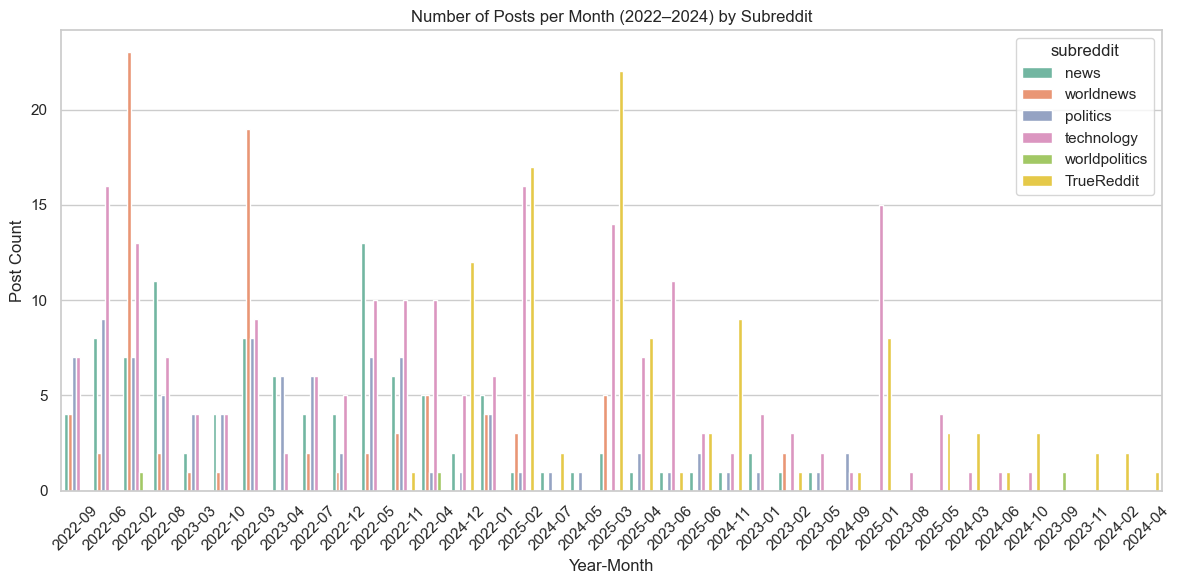

In [ ]:
recent_df = df[df['created_date'].dt.year >= 2022]

plt.figure(figsize=(12, 6))
sns.countplot(data=recent_df, x='year_month', hue='subreddit', palette='Set2')
plt.xticks(rotation=45)
plt.title("Number of Posts per Month (2022–2024) by Subreddit")
plt.xlabel("Year-Month")
plt.ylabel("Post Count")
plt.tight_layout()
plt.show()

### Average Score per Year by Subreddit

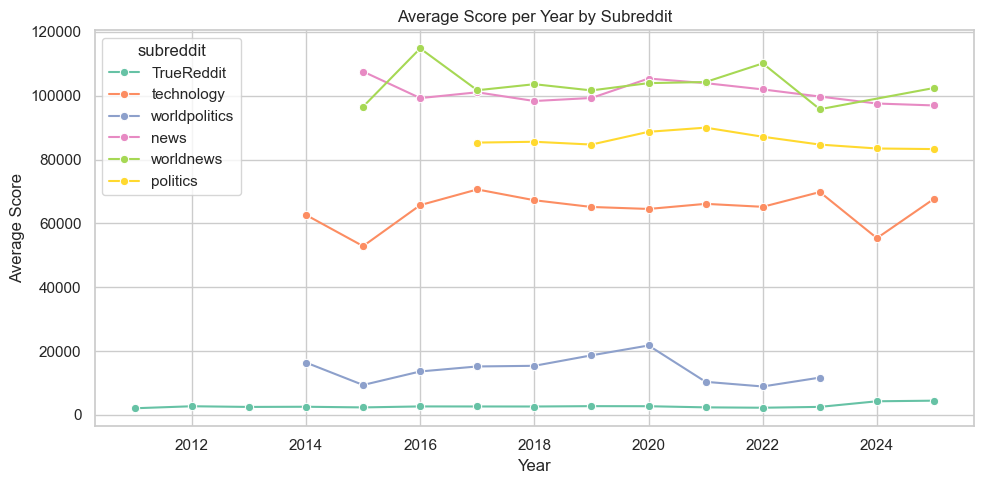

In [ ]:
df['year'] = df['created_date'].dt.year
avg_score_year = df.groupby(['year', 'subreddit'])['score'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_score_year, x='year', y='score', hue='subreddit', marker='o', palette='Set2')
plt.title("Average Score per Year by Subreddit")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


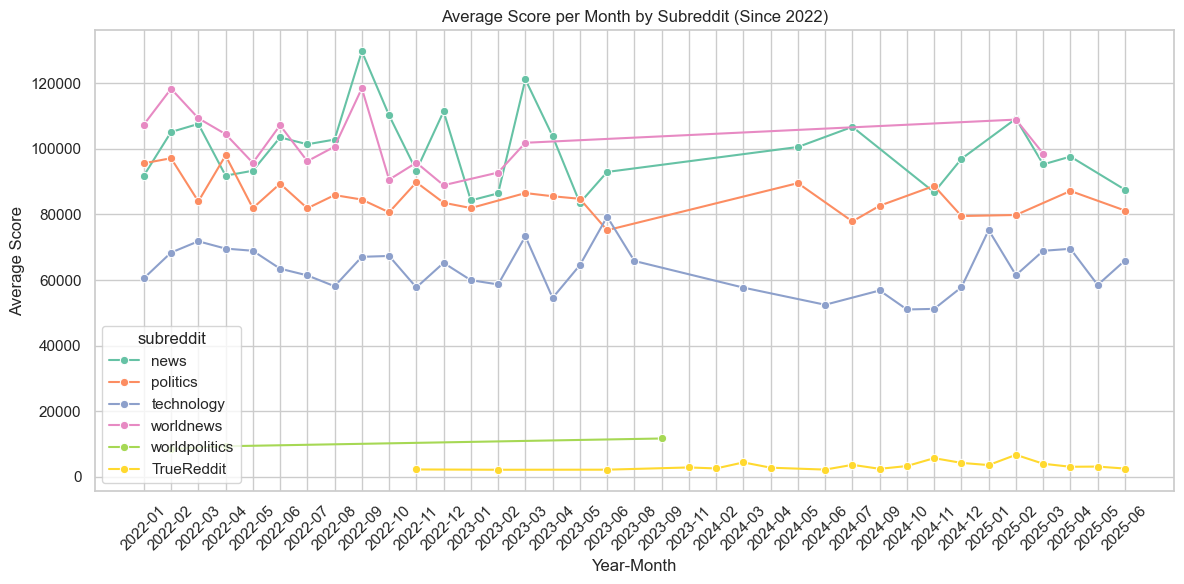

In [ ]:
# Filter to recent years
df_recent = df[df['created_date'] >= pd.to_datetime("2022-01-01")].copy()


# Group by year-month again
df_recent['year_month'] = df_recent['created_date'].dt.to_period('M')
avg_score_recent = df_recent.groupby(['year_month', 'subreddit'])['score'].mean().reset_index()
avg_score_recent['year_month_str'] = avg_score_recent['year_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_score_recent, x='year_month_str', y='score', hue='subreddit', marker='o', palette='Set2')
plt.xticks(rotation=45)
plt.title("Average Score per Month by Subreddit (Since 2022)")
plt.xlabel("Year-Month")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


### Average Comments per Post by Subreddit

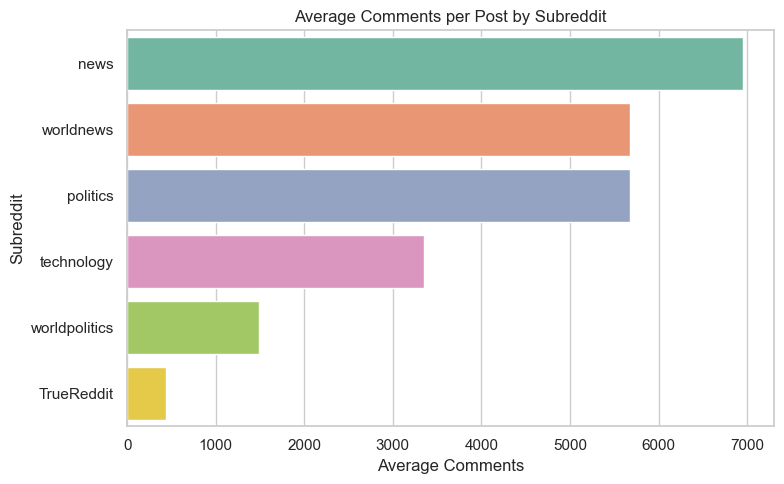

In [ ]:
avg_comments = df.groupby('subreddit')['num_comments'].mean().sort_values(ascending=False)
avg_comments_df = avg_comments.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_comments_df, x='num_comments', y='subreddit', hue='subreddit',palette='Set2')
plt.title("Average Comments per Post by Subreddit")
plt.xlabel("Average Comments")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()


### Correlation: Score vs. Comments

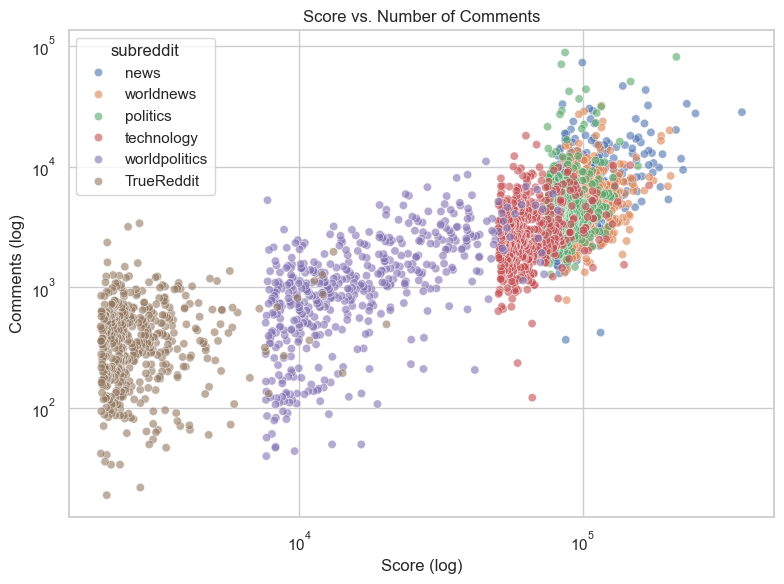

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='score', y='num_comments', hue='subreddit', alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.title("Score vs. Number of Comments")
plt.xlabel("Score (log)")
plt.ylabel("Comments (log)")
plt.tight_layout()
plt.show()


### Text based EDA

### Word frequency per subreddit

In [ ]:
# Find rows where 'clean_title' is not a string
bad_titles = df[~df['clean_title'].apply(lambda x: isinstance(x, str))]

# Display them
print(bad_titles[['clean_title', 'subreddit']])
print(f"\nTotal non-string titles: {len(bad_titles)}")

     clean_title      subreddit
2131         NaN  worldpolitics
2154         NaN  worldpolitics
2211         NaN  worldpolitics

Total non-string titles: 3


In [ ]:
# Remove rows where 'clean_title' is not a string
df = df[df['clean_title'].apply(lambda x: isinstance(x, str))].copy()

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    tokens = text.lower().split()
    cleaned = []
    for token in tokens:
        token = token.strip(string.punctuation).strip()
        if token and token.isalpha() and token not in stop_words:
            cleaned.append(token)
    return cleaned

# Create tokenized column
df['tokens'] = df['clean_title'].apply(clean_and_tokenize)

# Word frequency per subreddit
for subreddit in df['subreddit'].unique():
    words = df[df['subreddit'] == subreddit]['tokens'].explode()
    words = words[words.apply(lambda x: isinstance(x, str))]
    top_words = Counter(words).most_common(15)

    print(f"\nTop words in r/{subreddit}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")


Top words in r/news:
us: 43
police: 38
says: 34
trump: 33
man: 29
new: 22
court: 19
black: 19
dies: 17
state: 17
guilty: 16
charged: 16
covid: 15
officers: 15
found: 14

Top words in r/worldnews:
us: 71
trump: 63
says: 49
russia: 35
coronavirus: 34
china: 33
new: 31
president: 28
russian: 28
world: 28
covid: 27
putin: 26
people: 24
ukraine: 22
kong: 20

Top words in r/politics:
trump: 154
biden: 67
says: 63
us: 39
president: 31
election: 31
house: 29
capitol: 26
donald: 23
senate: 22
white: 22
vote: 22
coronavirus: 22
calls: 22
bill: 22

Top words in r/technology:
neutrality: 49
net: 48
fcc: 44
facebook: 44
us: 39
says: 37
amazon: 36
data: 34
reddit: 32
twitter: 30
trump: 26
internet: 25
ceo: 25
million: 25
company: 21

Top words in r/worldpolitics:
trump: 49
schlop: 43
upvote: 34
dont: 20
bernie: 20
president: 18
like: 18
get: 18
sanders: 18
people: 18
us: 17
america: 15
fuck: 10
white: 10
american: 10

Top words in r/TrueReddit:
trump: 61
us: 50
people: 42
american: 32
america: 28
n

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marynakyslytsyna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Word Cloud per subreddit

In [ ]:
# Define a set of words to exclude
exclude_words = {'schlop', 'upvote', 'fuck', 'says', 'dont', 'get', 'like',
    'one', 'us', 'man', 'people', 'years', 'year',
    'america', 'white', 'black'}

# Remove them from the token lists
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in exclude_words])

In [ ]:
# Flatten all tokens and find non-string items
all_tokens = df['tokens'].explode()
non_string_tokens = all_tokens[all_tokens.apply(lambda x: not isinstance(x, str))]

print(f"Number of non-string items in all tokens: {len(non_string_tokens)}")
print(non_string_tokens.unique())

Number of non-string items in all tokens: 10
[nan]


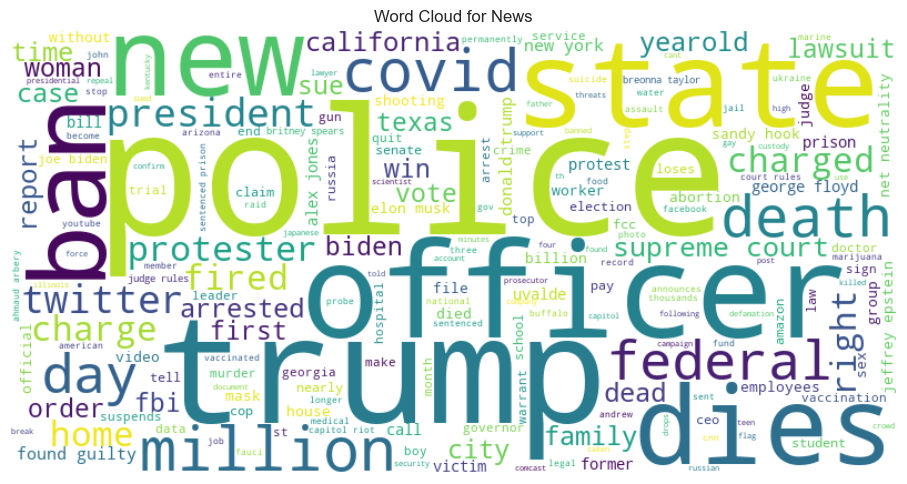

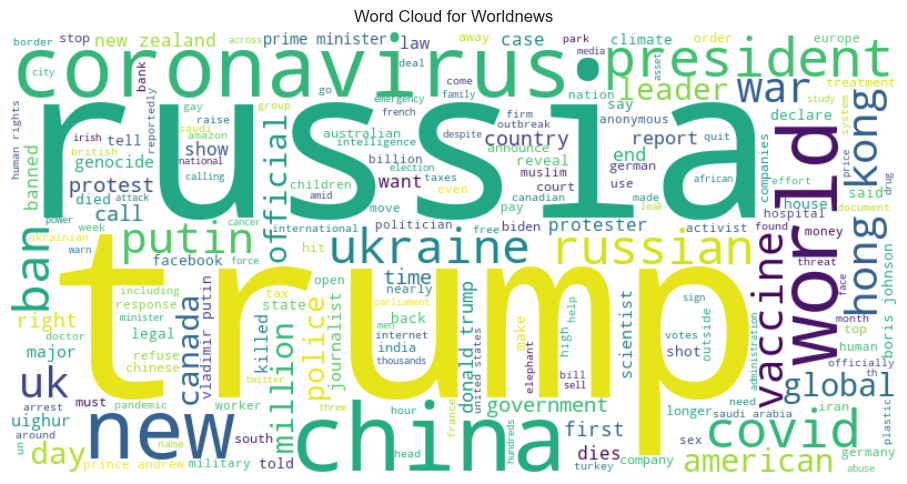

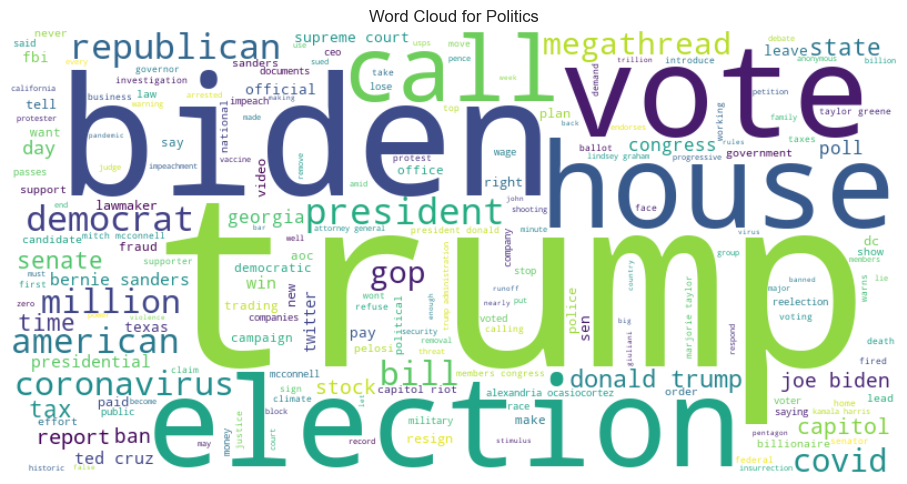

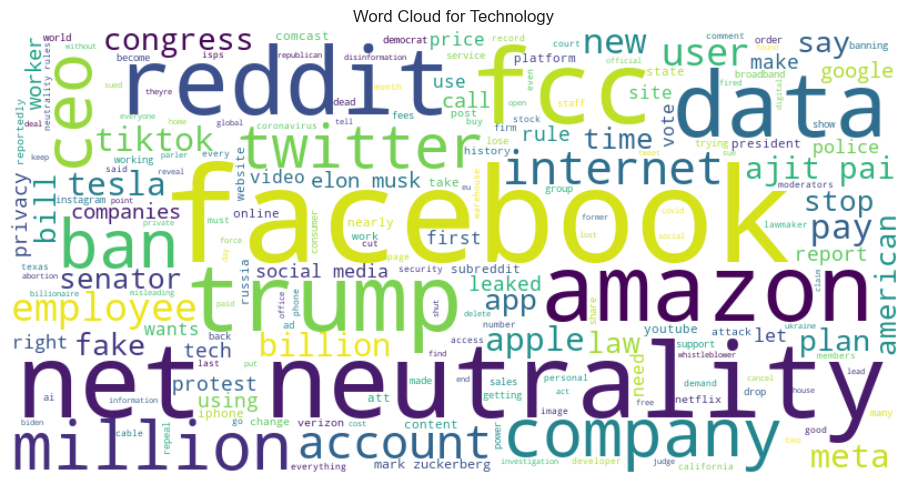

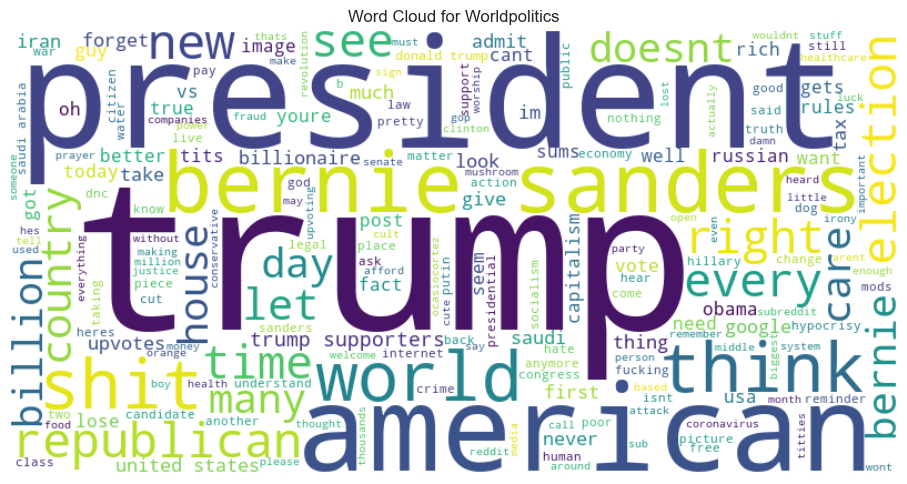

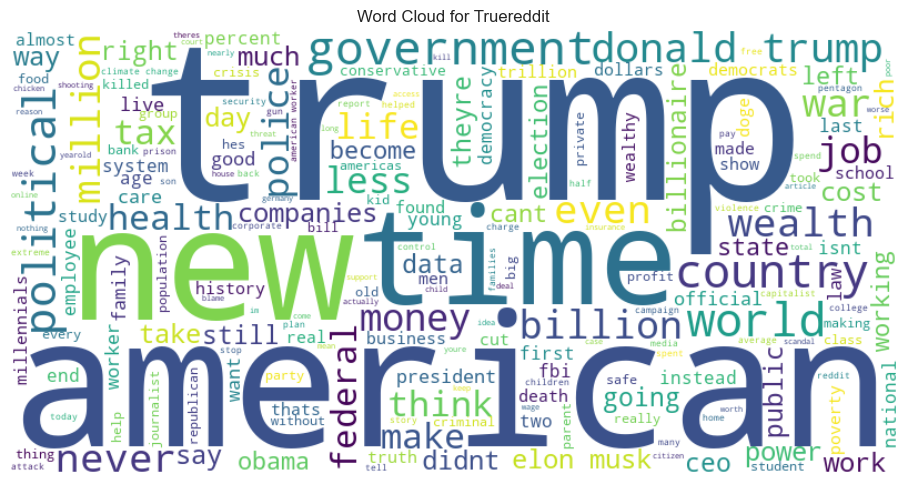

In [ ]:
from wordcloud import WordCloud

for subreddit in df['subreddit'].unique():
    words = df[df['subreddit'] == subreddit]['tokens'].explode()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
        ' '.join(word for word in words if isinstance(word, str))
    )

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {subreddit.capitalize()}")
    plt.tight_layout()
    plt.show()

### Post length and word count analysis

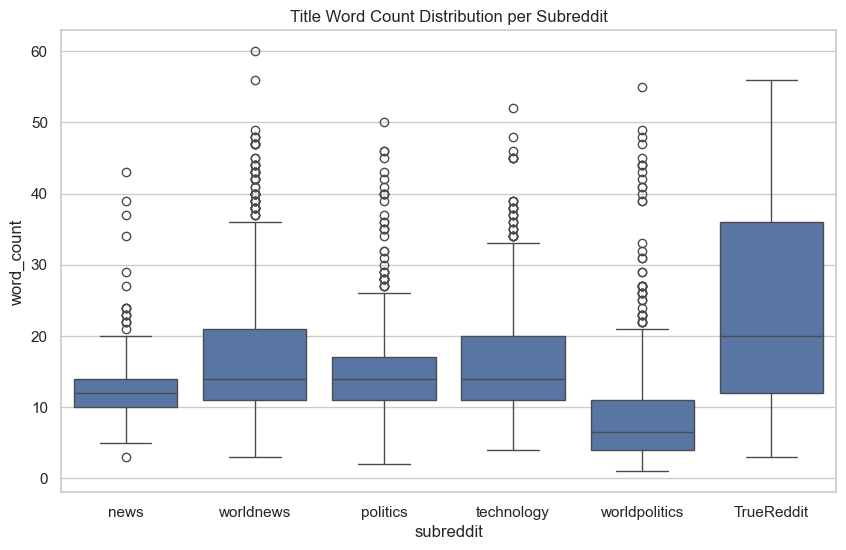

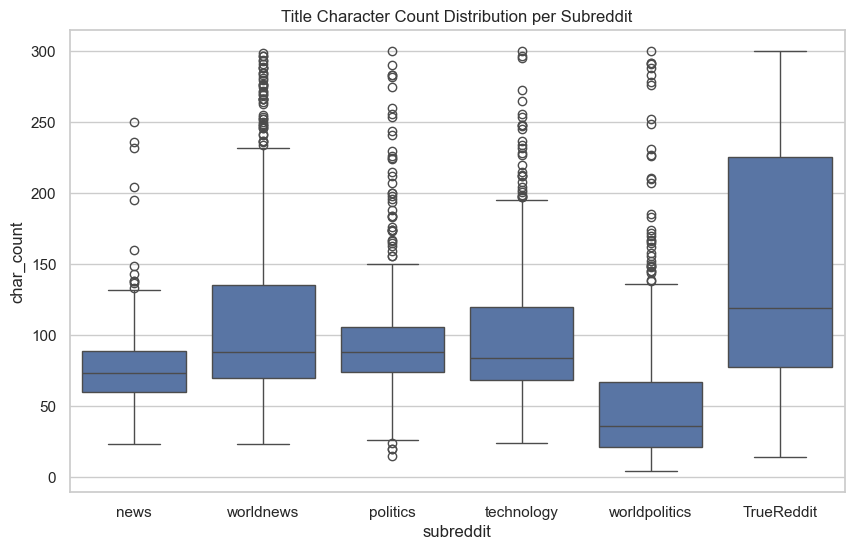

In [ ]:
df['word_count'] = df['title'].apply(lambda x: len(x.split()))
df['char_count'] = df['title'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subreddit', y='word_count')
plt.title("Title Word Count Distribution per Subreddit")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subreddit', y='char_count')
plt.title("Title Character Count Distribution per Subreddit")
plt.show()


### Sentiment Analysis (preview)

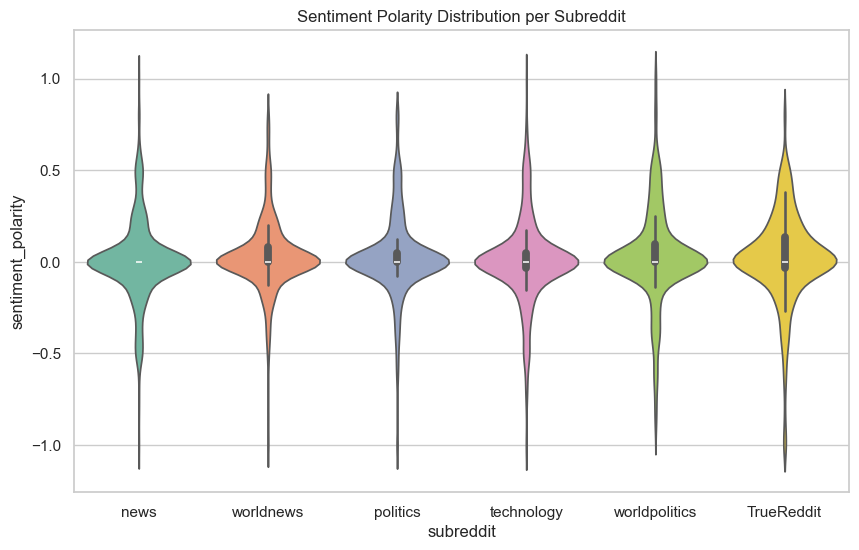

In [ ]:
from textblob import TextBlob

df['sentiment_polarity'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='subreddit', y='sentiment_polarity', hue='subreddit', palette='Set2')
plt.title("Sentiment Polarity Distribution per Subreddit")
plt.show()